# Problem Statement

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Variable Definition

In [ ]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [14]:
test = pd.read_csv(r"C:\Users\hp\Downloads\Programs\dataset\Black_Friday\test.csv")
train = pd.read_csv(r"C:\Users\hp\Downloads\Programs\dataset\Black_Friday\train.csv")

train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [16]:
train.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


We are able to find three different datatypes as

2 columns with float64

5 columns with int64

5 columns with object

Gender & City_Category are categorical (Nominal) variables, Age column has values in grouped manner. We need to preprocess them, which we can see in the later section

## Quick Insights on the data types

The Data types are classified into two as Quantitative and Categorical Quantitative data takes on numeric values that allow us to perform mathematical operations (like the number of dogs). Categorical are used to label a group or set of items (like dog breeds - Collies, Labs, Poodles, etc.).

Categorical Ordinal vs. Categorical Nominal We can divide categorical data further into two types: Ordinal and Nominal. Categorical Ordinal data take on a ranked ordering (like a ranked interaction on a scale from Very Poor to Very Good with the dogs). Categorical Nominal data do not have an order or ranking (like the breeds of the dog).

Continuous vs. Discrete We can think of quantitative data as being either continuous or discrete. Continuous data can be split into smaller and smaller units, and still a smaller unit exists. An example of this is the age of the dog - we can measure the units of the age in years, months, days, hours, seconds, but there are still smaller units that could be associated with the age. Discrete data only takes on countable values. The number of dogs we interact with is an example of a discrete data type.

## Data Analysis

<AxesSubplot:>

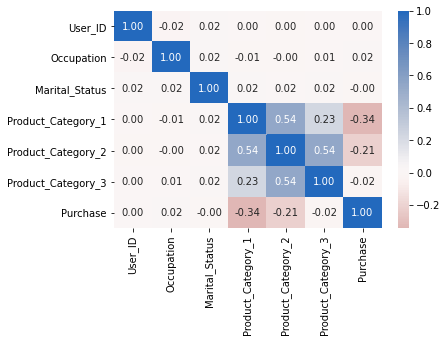

In [18]:
sns.heatmap(train.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

Product_Category_1, Product_Category_2 & Product_Category_3 correlation vale >.5 which is moderate.

In [11]:
len(train['User_ID'].unique())

5891

In [12]:
len(train['Product_ID'].unique())

3631

In [13]:
len(test['Product_ID'].unique())

3491

In [14]:
train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [16]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
train["Stay_In_Current_City_Years"].unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
train["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [20]:
train["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
train["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

## Unique elements in each attributes

In [20]:
train.nunique()


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop User_ID and Product_ID for model prediction as it has more unique values.

## Quick Insights about the EDA


What is Exploratory Data Analysis? Exploratory analysis is done when you are searching for insights from the data using the plots. More details refer the here

Target Variable Purchase

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


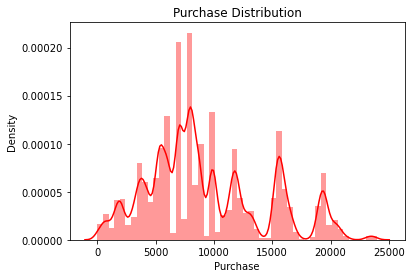

In [22]:
sns.distplot(train["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


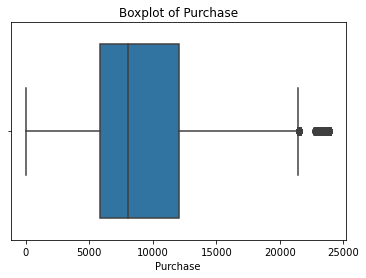

In [23]:
sns.boxplot(train["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [26]:
train["Purchase"].skew()

0.6001400037087128

In [25]:
train["Purchase"].kurtosis()

-0.3383775655851702

In [27]:
train["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

## Gender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


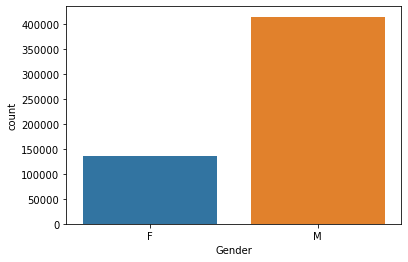

In [28]:
sns.countplot(train['Gender'])
plt.show()

In [29]:
train['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [30]:
train.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

## Marital Status

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


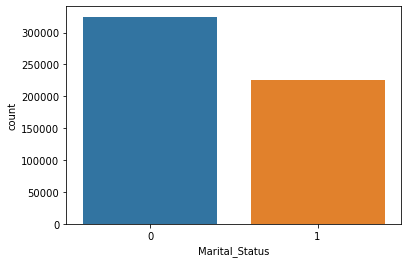

In [32]:
sns.countplot(train['Marital_Status'])
plt.show()

In [33]:
train.groupby("Marital_Status").mean()["Purchase"]


Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

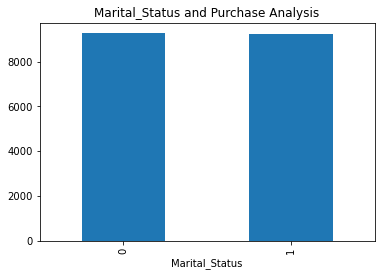

In [34]:
train.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


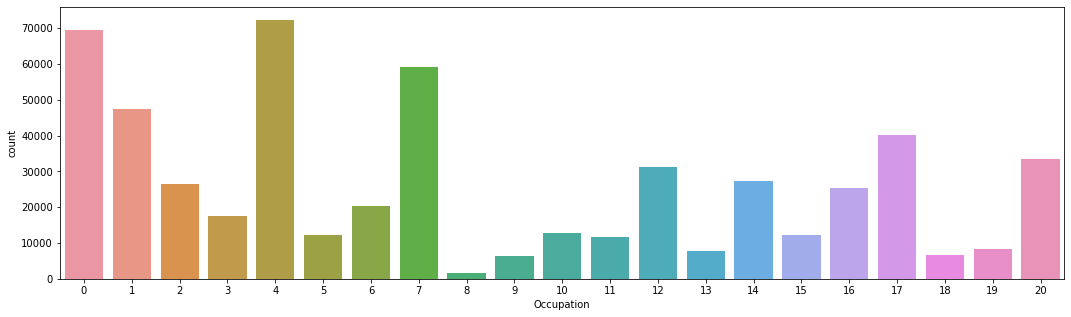

In [35]:
plt.figure(figsize=(18,5))
sns.countplot(train['Occupation'])
plt.show()

Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [36]:
occup = pd.DataFrame(train.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


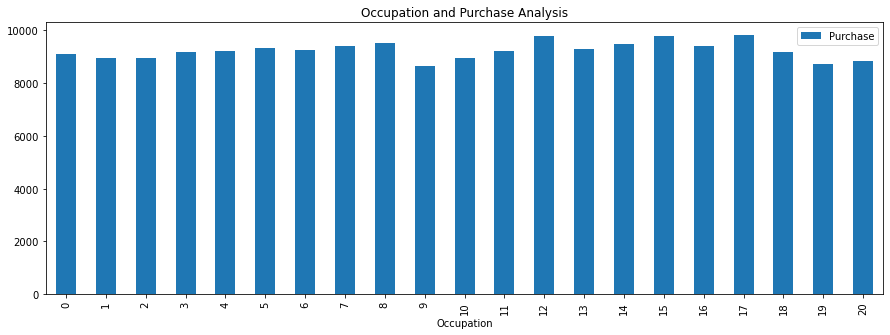

In [37]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

## City_Category

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


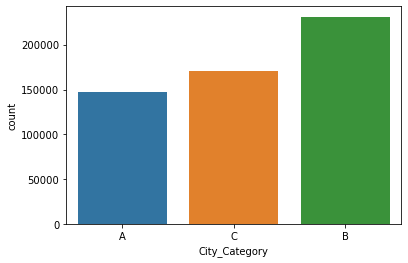

In [38]:
sns.countplot(train['City_Category'])
plt.show()

It is observed that city category B has made the most number of puchases.

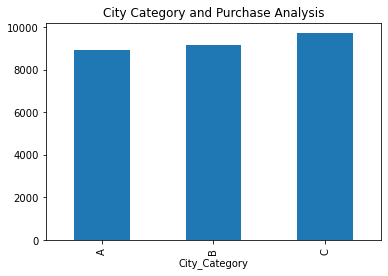

In [39]:
train.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

However, the city whose buyers spend the most is city type ‘C’.

## Stay_In_Current_City_Year

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


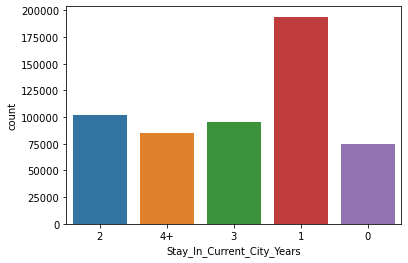

In [40]:
sns.countplot(train['Stay_In_Current_City_Years'])
plt.show()

It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed

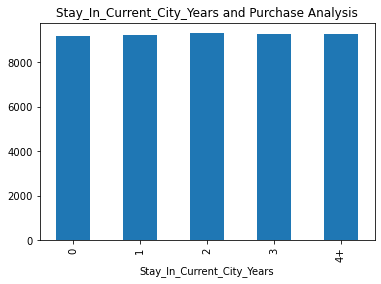

In [41]:
train.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

## Age

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


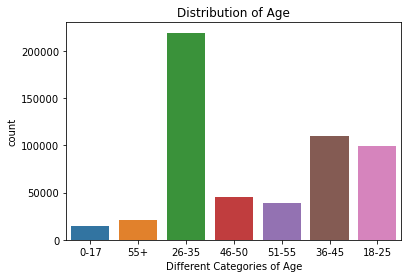

In [42]:
sns.countplot(train['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group

<AxesSubplot:xlabel='Age'>

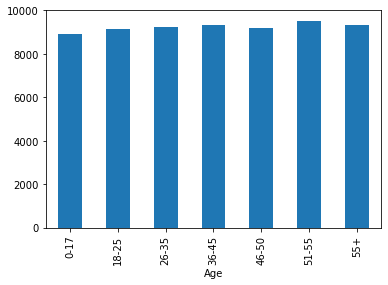

In [43]:
train.groupby("Age").mean()["Purchase"].plot(kind='bar')

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

## Product_Category_1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


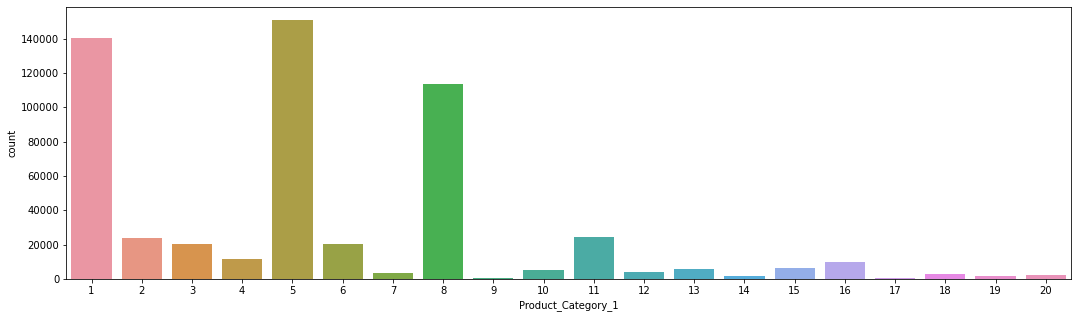

In [44]:
plt.figure(figsize=(18,5))
sns.countplot(train['Product_Category_1'])
plt.show()

It is clear that Product_Category_1 numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

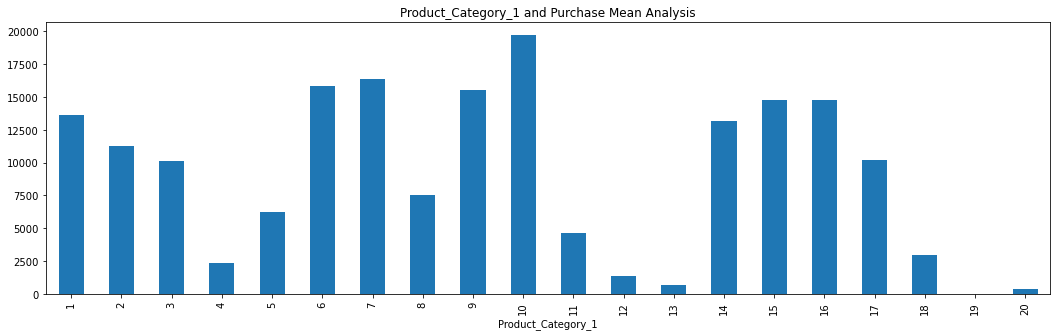

In [45]:
train.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

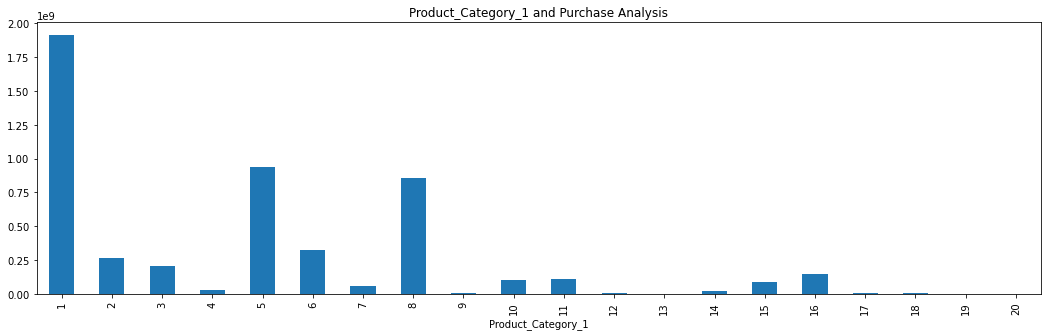

In [46]:
train.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.



## Product_Category_2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


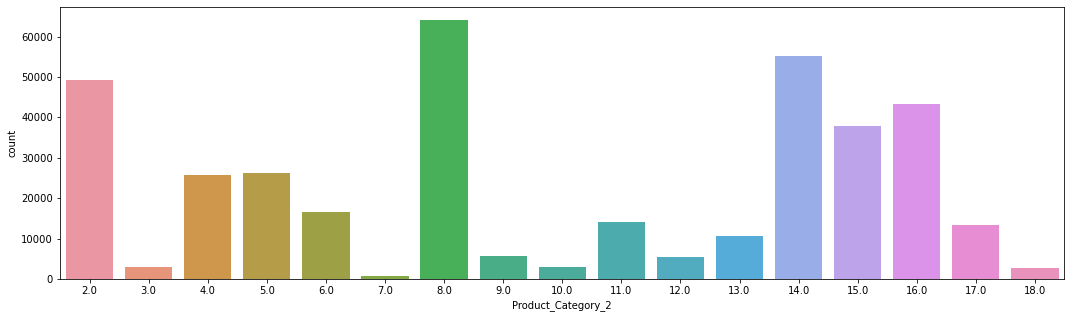

In [47]:
plt.figure(figsize=(18,5))
sns.countplot(train['Product_Category_2'])
plt.show()

## Product_Category_3

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


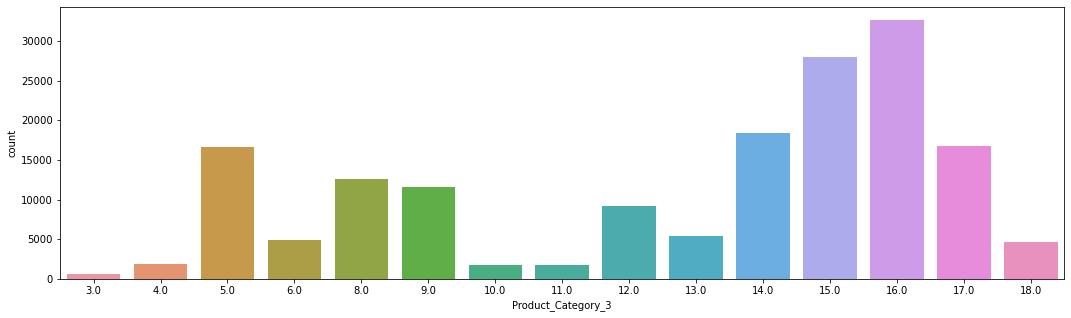

In [48]:
plt.figure(figsize=(18,5))
sns.countplot(train['Product_Category_3'])
plt.show()

## Pre Process data

In [58]:
new_train = train.replace({
    'M':0,
    'F':1,
    'A':0,
    'B':1,
    'C':2,
    '0-17':0,
    '18-25':1,
    '26-35':2,
    '36-45':3,
    '46-50':4,
    '51-55':5,
    '55+':6,
    '4+':4
})
new_train = new_train.fillna(0)
new_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,069042,1,0,10,0,2,0,3,0.0,0.0,8370
1,0,248942,1,0,10,0,2,0,1,6.0,14.0,15200
2,0,087842,1,0,10,0,2,0,12,0.0,0.0,1422
3,0,085442,1,0,10,0,2,0,12,14.0,0.0,1057
4,1,285442,0,6,16,2,4,0,8,0.0,0.0,7969


# Modelling

In [121]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
new_train['Stay_In_Current_City_Years'] = lbl.fit_transform(new_train['Stay_In_Current_City_Years'].astype(int))

In [116]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(8), object(1)
memory usage: 48.3+ MB


In [122]:
feature_cols=[
    'Gender',
    'Age',
    'Occupation',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status',
    'Product_Category_1',
    "Product_Category_2",
    'Product_Category_3'
]
X=new_train[feature_cols]
y=new_train['Purchase']

## Splitting Training and Test Dataset

## Linear Regression

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [125]:
print(linreg.intercept_)
print(linreg.coef_)
zip(feature_cols, linreg.coef_)

9971.449200127081
[-486.63093263  104.71585076    5.97207011  318.42968609   10.56324078
  -50.93079943 -345.40269857   12.81273876  144.24803828]


In [127]:
y_pred=linreg.predict(X_test)
df=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df.head()

,Actual,Predicted
29313,8240,9505.065155
439042,10635,9545.650730
298340,7177,8930.242711
343199,7980,7661.385948
437161,19643,11897.211481


In [128]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


Mean Absolute Error: 3533.1912601613208
Mean Squared Error: 21373243.30141287


In [130]:
def rmse(y,ypred):
    return(np.sqrt(sum((y-ypred)*(y-ypred))/len(y)))


In [131]:
print('Root Mean Squared Error:',rmse(y_test,y_pred))


Root Mean Squared Error: 4623.1205155623165


## Decision Tree Regressor

In [132]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df.head()

,Actual,Predicted
29313,8240,6845.250000
439042,10635,10149.500000
298340,7177,3487.000000
343199,7980,6973.766667
437161,19643,19642.000000


In [133]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


RMSE: 3340.644416134146


## XGBoost 

In [134]:
pip install xgboost

In [135]:
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df.head()

,Actual,Predicted
29313,8240,10745.020508
439042,10635,9276.326172
298340,7177,6792.362793
343199,7980,6949.062988
437161,19643,15573.311523


In [136]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 2869.685548437622


In [137]:
new_test = test.replace({
    'M':0,
    'F':1,
    'A':0,
    'B':1,
    'C':2,
    '0-17':0,
    '18-25':1,
    '26-35':2,
    '36-45':3,
    '46-50':4,
    '51-55':5,
    '55+':6,
    '4+':4,
})
new_test=new_test.fillna(0)
new_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,3,128942,0,4,7,1,2,1,1,11.0,0.0
1,8,113442,0,2,17,2,0,0,3,5.0,0.0
2,9,288442,1,3,1,1,4,1,5,14.0,0.0
3,9,145342,1,3,1,1,4,1,4,9.0,0.0
4,10,053842,1,2,1,2,1,0,4,5.0,12.0


In [138]:
new_test['Stay_In_Current_City_Years'] =lbl.fit_transform (new_test['Stay_In_Current_City_Years'].astype(int))

In [139]:
Xtest=new_test[feature_cols]

In [140]:
y_sol=XG.predict(Xtest)


In [141]:
y_sol

array([14286.208 , 10691.118 ,  6639.3364, ..., 12158.772 , 19817.107 ,
        2398.6892], dtype=float32)

In [142]:
solution = pd.DataFrame({
        "User_ID": test["User_ID"],
        "Product_ID": test["Product_ID"],
         "Purchase" : y_sol
    })

In [143]:
solution.head()

,User_ID,Product_ID,Purchase
0,3,128942,14286.208008
1,8,113442,10691.118164
2,9,288442,6639.336426
3,9,145342,2699.150391
4,10,053842,2653.995361


In [144]:
solution.to_csv("solution.csv", index=False)


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2869